In [1]:
import math
import numpy as np
import tensorflow

def chaotic_neuron(y, k, alpha, a, epsilon):
    """
    Computes the next state of a chaotic neuron based on the given parameters.

    Parameters:
    y (float): Current state of the neuron.
    k (float): Gain factor.
    alpha (float): Nonlinearity parameter.
    a (float): Feedback parameter.
    epsilon (float): Perturbation parameter.

    Returns:
    float: Next state of the neuron.
    """
    f = 1/(1 + math.e**(-y/epsilon))


    return k*y - alpha*f + a

def prepare_data(x, delay=2):
    X = []
    y = []
    for i in range(delay, len(x)-1):
        X.append(x[i-delay:i])
        y.append(x[i])
    return np.array(X), np.array(y)




In [2]:
num_steps = 1000
x_series = np.array([0.0 for _ in range(num_steps)])
x_series[[0]] = 0.1  # Initial condition

for i in range(num_steps-1):
    x = chaotic_neuron(x_series[i], k=0.5, alpha=1.0, a=0.1, epsilon=0.04)
    x_series[i+1] = x

X, y = prepare_data(x_series, delay=2)



In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

X_rnn = X.reshape((X.shape[0], X.shape[1], 1))

model = Sequential([
    LSTM(100, activation='tanh', input_shape=(X_rnn.shape[1], 1), return_sequences=True),
    LSTM(50, activation='tanh'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_rnn, y, epochs=200, verbose=1)

c:\Users\adavy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0280
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0185
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068
Epoch 13/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061
Epoch 14/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055
Epoch 15/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049
Epoc

In [4]:
def recursive_forecast(model, seed_input, steps, delay=2):
    preds = list(seed_input)
    for _ in range(steps):
        input_data = np.array(preds[-delay:]).reshape(1, delay, 1)
        next_val = model.predict(input_data, verbose=0)[0, 0]
        preds.append(next_val)
    return preds

predicted = recursive_forecast(model, x_series[-102:-100], steps=100)
true_vals = x_series[-100:]

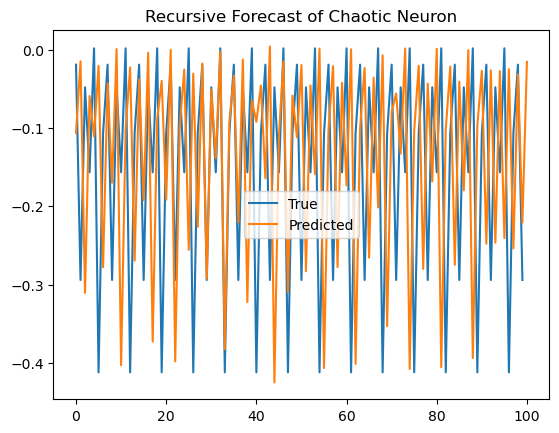

In [5]:
import matplotlib.pyplot as plt
plt.plot(true_vals, label="True")
plt.plot(predicted[1:], label="Predicted")
plt.legend()
plt.title("Recursive Forecast of Chaotic Neuron")
plt.show()

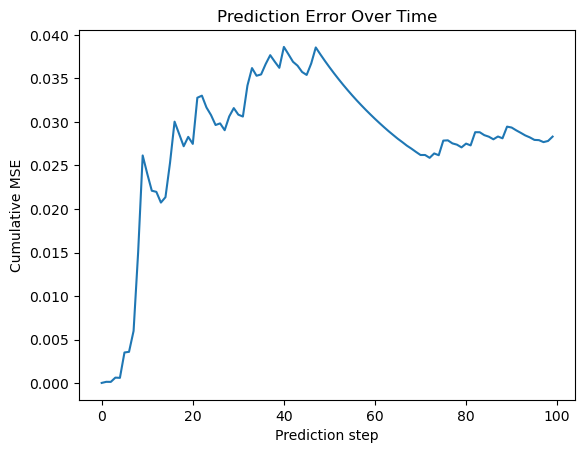

In [6]:
from sklearn.metrics import mean_squared_error

errors = []
for i in range(len(true_vals)):
    mse = mean_squared_error(true_vals[:i+1], predicted[2:i+3])
    errors.append(mse)

plt.plot(errors)
plt.xlabel("Prediction step")
plt.ylabel("Cumulative MSE")
plt.title("Prediction Error Over Time")
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(200, activation='tanh', input_shape=(X.shape[1],)),
    Dense(100, activation='tanh'),
    Dropout(0.2),
    Dense(50, activation='tanh'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=1, validation_split=0.2)





Epoch 1/200


c:\Users\adavy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0223 - val_loss: 0.0131
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0118 - val_loss: 0.0130
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0129 - val_loss: 0.0130
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0121 - val_loss: 0.0113
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0103 - val_loss: 0.0110
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123 - val_loss: 0.0109
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0110 - val_loss: 0.0111
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0117 - val_loss: 0.0111
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0107 - val_loss: 0.0112
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0104 - val_l

In [8]:
def recursive_forecast(model, seed_input, steps, delay=2):
    preds = list(seed_input)
    for _ in range(steps):
        input_data = np.array(preds[-delay:]).reshape(1, delay, 1)
        next_val = model.predict(input_data, verbose=0)[0, 0]
        preds.append(next_val)
    return preds

predicted = recursive_forecast(model, x_series[-102:-100], steps=100)
true_vals = x_series[-100:]

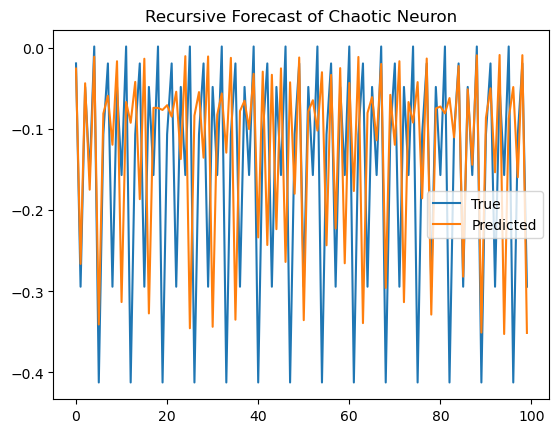

In [9]:
import matplotlib.pyplot as plt
plt.plot(true_vals, label="True")
plt.plot(predicted[2:], label="Predicted")
plt.legend()
plt.title("Recursive Forecast of Chaotic Neuron")
plt.show()

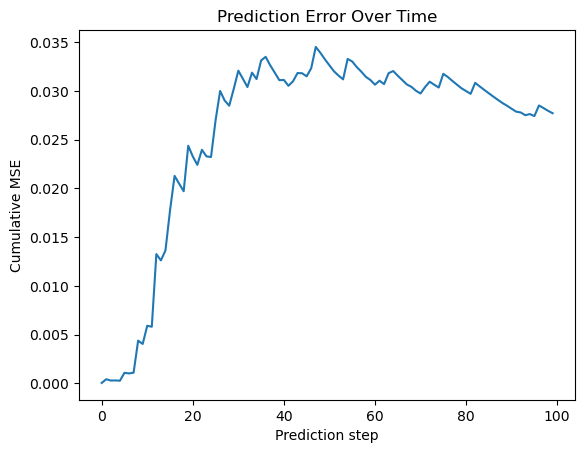

In [10]:
from sklearn.metrics import mean_squared_error

errors = []
for i in range(len(true_vals)):
    mse = mean_squared_error(true_vals[:i+1], predicted[2:i+3])
    errors.append(mse)

plt.plot(errors)
plt.xlabel("Prediction step")
plt.ylabel("Cumulative MSE")
plt.title("Prediction Error Over Time")
plt.show()